In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import glob
import re

In [7]:
oxford = pd.read_csv('./OxCGRT_Download_180420_014315_Full.csv')
oxford.tail()

,CountryName,CountryCode,Date,S1_School closing,S1_IsGeneral,S1_Notes,S2_Workplace closing,S2_IsGeneral,S2_Notes,S3_Cancel public events,...,S11_Notes,S12_Testing framework,S12_Notes,S13_Contact tracing,S13_Notes,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39
15981,Kosovo,RKS,20200413,2.0,1.0,"On 26 Mar 2020, the Government decided to exte...",2.0,0.0,Public Health Emergency declared on 15 March 2...,2.0,...,NaN,2.0,NaN,2.0,NaN,283.0,7.0,90.48,90.48,\t
15982,Kosovo,RKS,20200414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,387.0,8.0,NaN,90.48,\t
15983,Kosovo,RKS,20200415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,387.0,8.0,NaN,90.48,\t
15984,Kosovo,RKS,20200416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,449.0,11.0,NaN,90.48,\t
15985,Kosovo,RKS,20200417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,480.0,12.0,NaN,90.48,\t


In [8]:
pd.to_datetime(oxford.Date, format='%Y%m%d', errors='coerce')

0       2020-01-01
1       2020-01-02
2       2020-01-03
3       2020-01-04
4       2020-01-05
           ...    
15981   2020-04-13
15982   2020-04-14
15983   2020-04-15
15984   2020-04-16
15985   2020-04-17
Name: Date, Length: 15986, dtype: datetime64[ns]

In [9]:
oxford_small = oxford.copy()
for x in oxford.columns:
    if (x.count('Notes')>0) | (x.count('IsGeneral')>0):
        oxford_small.drop(columns=x, inplace=True)
        
oxford_small.drop(columns='Unnamed: 39', inplace=True)
oxford_small.loc[:, 'Date'] = pd.to_datetime(oxford_small.Date, format='%Y%m%d', errors='coerce')

In [8]:
oxford_small

,CountryName,CountryCode,Date,S1_School closing,S2_Workplace closing,S3_Cancel public events,S4_Close public transport,S5_Public information campaigns,S6_Restrictions on internal movement,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay
0,Aruba,ABW,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.00
1,Aruba,ABW,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.00
2,Aruba,ABW,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.00
3,Aruba,ABW,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.00
4,Aruba,ABW,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,Kosovo,RKS,2020-04-13,2.0,2.0,2.0,2.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,283.0,7.0,90.48,90.48
15982,Kosovo,RKS,2020-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.0,8.0,NaN,90.48
15983,Kosovo,RKS,2020-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.0,8.0,NaN,90.48
15984,Kosovo,RKS,2020-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.0,11.0,NaN,90.48


For WHATEVER reason, I cannot use idxmin or idxmax to get the correct date when the date is the index, but
if DATE is kept as a column I can use max or min. 

In [17]:
time_series_by_country.loc[('Afghanistan', '2020-01-01'), :].index

MultiIndex([('Afghanistan', '2020-01-01')],
           names=['CountryName', 'Date'])

In [33]:
time_series_by_country = oxford_small.groupby(by=['CountryName','Date']).sum()
test = time_series_by_country.replace(to_replace=0., value=np.nan).loc[('United States'),:]#.reset_index()
for c in test.columns:
    print(test[c].dropna().idxmin())
    print(test[c].dropna().idxmax())
# fuckoff = time_series_by_country.loc['France',:].reset_index()
# fuckoff
# fuckoff[fuckoff['S1_School closing']==2].Date.max()

2020-03-03 00:00:00
2020-03-05 00:00:00
2020-03-19 00:00:00
2020-03-19 00:00:00
2020-03-12 00:00:00
2020-03-12 00:00:00
2020-03-17 00:00:00
2020-03-17 00:00:00
2020-03-17 00:00:00
2020-03-17 00:00:00
2020-03-14 00:00:00
2020-03-19 00:00:00
2020-02-02 00:00:00
2020-03-02 00:00:00
2020-03-06 00:00:00
2020-03-27 00:00:00
2020-03-16 00:00:00
2020-01-01 00:00:00
2020-03-06 00:00:00
2020-03-27 00:00:00
2020-03-06 00:00:00
2020-03-06 00:00:00
2020-02-28 00:00:00
2020-03-14 00:00:00
2020-01-21 00:00:00
2020-01-21 00:00:00
2020-01-21 00:00:00
2020-04-17 00:00:00
2020-03-01 00:00:00
2020-04-17 00:00:00
2020-02-02 00:00:00
2020-03-19 00:00:00
2020-02-02 00:00:00
2020-03-19 00:00:00


In [42]:
first_dates = time_series_by_country[time_series_by_country==2].groupby(level=0)['S1_School closing'].idxmin().dropna().apply(lambda x : x[-1])
first_dates

CountryName
Afghanistan   2020-03-14
Albania       2020-03-09
Algeria       2020-03-12
Andorra       2020-03-16
Angola        2020-03-24
                 ...    
Uzbekistan    2020-03-16
Venezuela     2020-03-16
Vietnam       2020-02-03
Zambia        2020-03-20
Zimbabwe      2020-03-24
Name: S1_School closing, Length: 143, dtype: datetime64[ns]

In [97]:
france_time_series = time_series_by_country.loc['France',:]
france_time_series2 = france_time_series[france_time_series==2]
france_time_series2['S1_School closing'].dropna().idxmin()

Timestamp('2020-03-16 00:00:00')

In [86]:
france_time_series = time_series_by_country.loc['France',:]
france_time_series[france_time_series==2].idxmin()#.groupby(level=0)['S1_School closing'])#.sort_index()[-40:]#.idxmax()#.plot()#.value_counts()

S1_School closing                         2020-03-16
S2_Workplace closing                      2020-03-17
S3_Cancel public events                   2020-02-29
S4_Close public transport                 2020-03-16
S5_Public information campaigns                  NaT
S6_Restrictions on internal movement      2020-03-17
S7_International travel controls          2020-01-31
S8_Fiscal measures                               NaT
S9_Monetary measures                             NaT
S10_Emergency investment in health care          NaT
S11_Investment in Vaccines                       NaT
S12_Testing framework                            NaT
S13_Contact tracing                              NaT
ConfirmedCases                                   NaT
ConfirmedDeaths                           2020-02-27
StringencyIndex                                  NaT
StringencyIndexForDisplay                        NaT
dtype: datetime64[ns]

In [48]:
last_dates = time_series_by_country[time_series_by_country==1].groupby(level=0)['S1_School closing'].idxmin()#.dropna().apply(lambda x : x[-1])
last_dates

CountryName
Afghanistan    NaN
Albania        NaN
Algeria        NaN
Andorra        NaN
Angola         NaN
              ... 
Uzbekistan     NaN
Venezuela      NaN
Vietnam        NaN
Zambia         NaN
Zimbabwe       NaN
Name: S1_School closing, Length: 149, dtype: object

Two-way ANOVA: Factor A will be quarantine type? Factor B is Country? Only count countries where
quarantine has been active for 2 weeks consectutively. The trials will be the time series. (weighted by population, and number of tests).

Take a subset of data which has implemented all quarantine measures that will be tested. 
The quantifiable measure will be 


OK: averaging over the time series is dubious because of confounding factors. 

In [148]:
total_controls_by_country = oxford_small.groupby(by=['CountryName','Date']).sum().loc[:, 'S1_School closing':'S7_International travel controls']
(total_controls_by_country > 0).sum(axis=1)

CountryName  Date      
Afghanistan  2020-01-01    0
             2020-01-02    0
             2020-01-03    0
             2020-01-04    0
             2020-01-05    0
                          ..
Zimbabwe     2020-04-14    7
             2020-04-15    7
             2020-04-16    7
             2020-04-17    7
             2020-04-18    7
Length: 15986, dtype: int64

In [140]:
oxford_small.groupby(by=['CountryName','Date']).sum().loc[:, 'S1_School closing':'S7_International travel controls'].sum(level=0).drop(columns='S5_Public information campaigns')#['S1_School closing'].plot(marker='.',linestyle='none')

,S1_School closing,S2_Workplace closing,S3_Cancel public events,S4_Close public transport,S6_Restrictions on internal movement,S7_International travel controls
CountryName,,,,,,
Afghanistan,72.0,48.0,98.0,46.0,52.0,48.0
Albania,30.0,0.0,30.0,2.0,2.0,45.0
Algeria,66.0,46.0,54.0,46.0,44.0,83.0
Andorra,58.0,40.0,40.0,0.0,40.0,0.0
Angola,48.0,45.0,48.0,0.0,42.0,189.0
...,...,...,...,...,...,...
Uzbekistan,64.0,64.0,64.0,64.0,59.0,132.0
Venezuela,62.0,62.0,62.0,0.0,62.0,96.0
Vietnam,148.0,42.0,126.0,40.0,128.0,237.0


In [4]:
for c in oxford_small.columns:
    print("---- %s ---" % c)
    print(oxford_small[c].value_counts())

---- CountryName ---
Philippines       109
Afghanistan       109
Guatemala         109
Burundi           109
South Sudan       109
                 ... 
Canada            108
United Kingdom    108
Morocco           108
Guam               30
Cape Verde         30
Name: CountryName, Length: 149, dtype: int64
---- CountryCode ---
MWI    109
IRQ    109
GRL    109
MUS    109
ITA    109
      ... 
TZA    108
IDN    108
SVK    108
GUM     30
CPV     30
Name: CountryCode, Length: 149, dtype: int64
---- Date ---
2020-03-27    149
2020-04-16    149
2020-03-25    149
2020-04-07    149
2020-04-11    149
             ... 
2020-03-02    147
2020-01-05    147
2020-02-18    147
2020-03-05    147
2020-04-18     50
Name: Date, Length: 109, dtype: int64
---- S1_School closing ---
0.0    10552
2.0     4840
1.0      133
Name: S1_School closing, dtype: int64
---- S2_Workplace closing ---
0.0    11520
2.0     2874
1.0      940
Name: S2_Workplace closing, dtype: int64
---- S3_Cancel public events ---
0.0    1

In [67]:
pd.read_csv('./results/training_data_with_weather_info_week_4.csv').columns.tolist()

['Id',
 'Province_State',
 'Country_Region',
 'Date',
 'ConfirmedCases',
 'Fatalities',
 'country+province',
 'Lat',
 'Long',
 'day_from_jan_first',
 'temp',
 'min',
 'max',
 'stp',
 'slp',
 'dewp',
 'rh',
 'ah',
 'wdsp',
 'prcp',
 'fog']

In [2]:
IHME_data = pd.read_csv('./ihme-covid19/2020_04_12.02/Hospitalization_all_locs.csv')

In [9]:
split_data = re.split(pattern='N2O\S+yr', string=data)[1]
df_tmp = pd.read_csv(StringIO(split_data), 
             sep=('\s+'), 
             skiprows=1, 
                 usecols=[0,1,2,3,4,5], 
             engine='python')

Import N2O .dat files as strings, split into two components before and after the first column header
of form ''N2O``(observatory abbreviation)`` ``(Trace species)``yr'

"Trace species" is a place holder for the two observation types:
    
    1. Radiatively Important Trace Species (RITS) 
    2. Chromatograph for Atmospheric Trace Species (CATS)
    
Example: for the observatory located at Mauna Loa, Hawaii, United States (MLO) and CATS experiment, 
the corresponding string would be ``N2Omlocatsyr``

All cases are covered by regular expression ``N2O\S+yr``


In [58]:
for i, f in enumerate(glob.glob('.\\N2O\\*')):
    with open(f, 'r') as file:
        data = file.read()
    split_data = ''.join(re.split(pattern=r'(N2O\S+yr)', string=data)[1:])
    df_tmp = pd.read_csv(StringIO(split_data), 
                 sep=('\s+'), 
#                 skiprows=1, 
#                 usecols=[0,1,2,3,4,5], 
                 engine='python')
    df_tmp.index = pd.to_datetime(df_tmp.iloc[:,0].astype(str) + '-' 
                                  + df_tmp.iloc[:,1].astype(str) + '-' 
                                  + df_tmp.iloc[:,2].astype(str))
    df_tmp.drop(columns=df_tmp.columns.tolist()[:3], inplace=True)
    if i == 0:
        n2o = df_tmp
    else:
        n2o = n2o.join(df_tmp, how='inner')
    


In [3]:
dir_ =  'C:\\Users\\Matt\\Desktop\\statmethods\\group_project\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format0\\'
file = dir_ + '01-23-2020.csv'

In [4]:
dir_ =  'C:\\Users\\Matt\\Desktop\\statmethods\\group_project\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format0\\'
file = dir_ + '01-23-2020.csv'

In [5]:
dir0 = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format0\\'
dir1 = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format1\\'
dir2 = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format2\\'

In [129]:
global_cases = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_global.csv'
global_cases = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_global.csv'

In [193]:
uc =  '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_US.csv'
ud =  '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_deaths_US.csv'

In [194]:
popdat = pd.read_csv('population-figures-by-country-csv_csv.csv')

In [260]:
us_cases = pd.read_csv(uc)
us_deaths = pd.read_csv(ud)
us_deaths['type']='Dead'
us_cases['type']='Confirmed'

In [282]:
pd.concat((us_cases, us_deaths)).sort_index(axis=1).iloc[:, -13:]

,Admin2,Combined_Key,Country_Region,FIPS,Lat,Long_,Population,Province_State,UID,code3,iso2,iso3,type
0,NaN,"American Samoa, US",US,60.0,-14.2710,-170.1320,NaN,American Samoa,16,16,AS,ASM,Confirmed
1,NaN,"Guam, US",US,66.0,13.4443,144.7937,NaN,Guam,316,316,GU,GUM,Confirmed
2,NaN,"Northern Mariana Islands, US",US,69.0,15.0979,145.6739,NaN,Northern Mariana Islands,580,580,MP,MNP,Confirmed
3,NaN,"Puerto Rico, US",US,72.0,18.2208,-66.5901,NaN,Puerto Rico,630,630,PR,PRI,Confirmed
4,NaN,"Virgin Islands, US",US,78.0,18.3358,-64.8963,NaN,Virgin Islands,850,850,VI,VIR,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,Unassigned,"Unassigned, Wisconsin, US",US,90055.0,0.0000,0.0000,0.0,Wisconsin,84090055,840,US,USA,Dead
3251,Unassigned,"Unassigned, Wyoming, US",US,90056.0,0.0000,0.0000,0.0,Wyoming,84090056,840,US,USA,Dead
3252,NaN,"Grand Princess, US",US,99999.0,0.0000,0.0000,0.0,Grand Princess,84099999,840,US,USA,Dead
3253,Michigan Department of Corrections (MDOC),"Michigan Department of Corrections (MDOC), Mic...",US,NaN,0.0000,0.0000,0.0,Michigan,84070004,840,US,USA,Dead


In [220]:
us_deaths.set_index('Province_State').loc[:, '1/22/20':].groupby(level=0).sum()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,66,70,80,92,93,99,114,118,133,148
Alaska,0,0,0,0,0,0,0,0,0,0,...,7,7,7,8,8,8,9,9,9,9
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,80,89,97,108,115,122,131,142,150,169
Arkansas,0,0,0,0,0,0,0,0,0,0,...,18,21,21,25,27,29,32,33,37,37
California,0,0,0,0,0,0,0,0,0,0,...,495,544,583,604,640,714,767,860,956,1037
Colorado,0,0,0,0,0,0,0,0,0,0,...,193,193,226,250,289,306,327,328,355,372
Connecticut,0,0,0,0,0,0,0,0,0,0,...,326,380,448,494,554,602,671,868,971,1036
Delaware,0,0,0,0,0,0,0,0,0,0,...,19,23,32,33,35,41,43,46,55,61


In [283]:
dead=us_deaths[us_deaths['Province_State'].isin(['Michigan', 'Georgia', 'New York'])].groupby(by='Province_State').sum().loc[:,'1/22/20':]#.iloc[:, 4:].transpose().columns
confirmed=us_cases[us_cases['Province_State'].isin(['Michigan', 'Georgia', 'New York'])].groupby(by='Province_State').sum().loc[:,'1/22/20':]
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Georgia,0,0,0,0,0,0,0,0,0,0,...,9901,10566,11485,12159,12452,13315,14578,14987,15669,17194
Michigan,0,0,0,0,0,0,0,0,0,0,...,20346,21504,22434,23605,24244,25635,27001,28059,28809,30023
New York,0,0,0,0,0,0,0,0,0,0,...,151061,161779,172348,181026,189033,195749,203020,214454,223691,230597


In [284]:
rate = dead / confirmed

<Figure size 2000x2000 with 0 Axes>

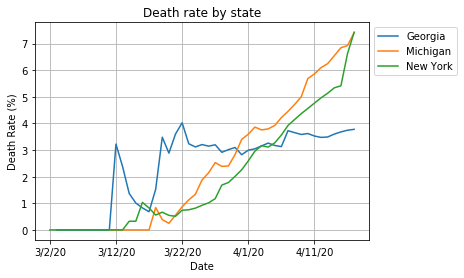

In [285]:
fig = plt.figure(figsize=(10,10), dpi=200)
(100*rate.loc[:, '2/21/20':]).transpose().plot().legend(bbox_to_anchor=(1, 1))
_ = plt.xlabel('Date')
_ = plt.ylabel('Death Rate (%)')
plt.grid(True, axis='both')
plt.title('Death rate by state')
plt.savefig('death_rate_NY_MI_GA.png', bbox_inches='tight')

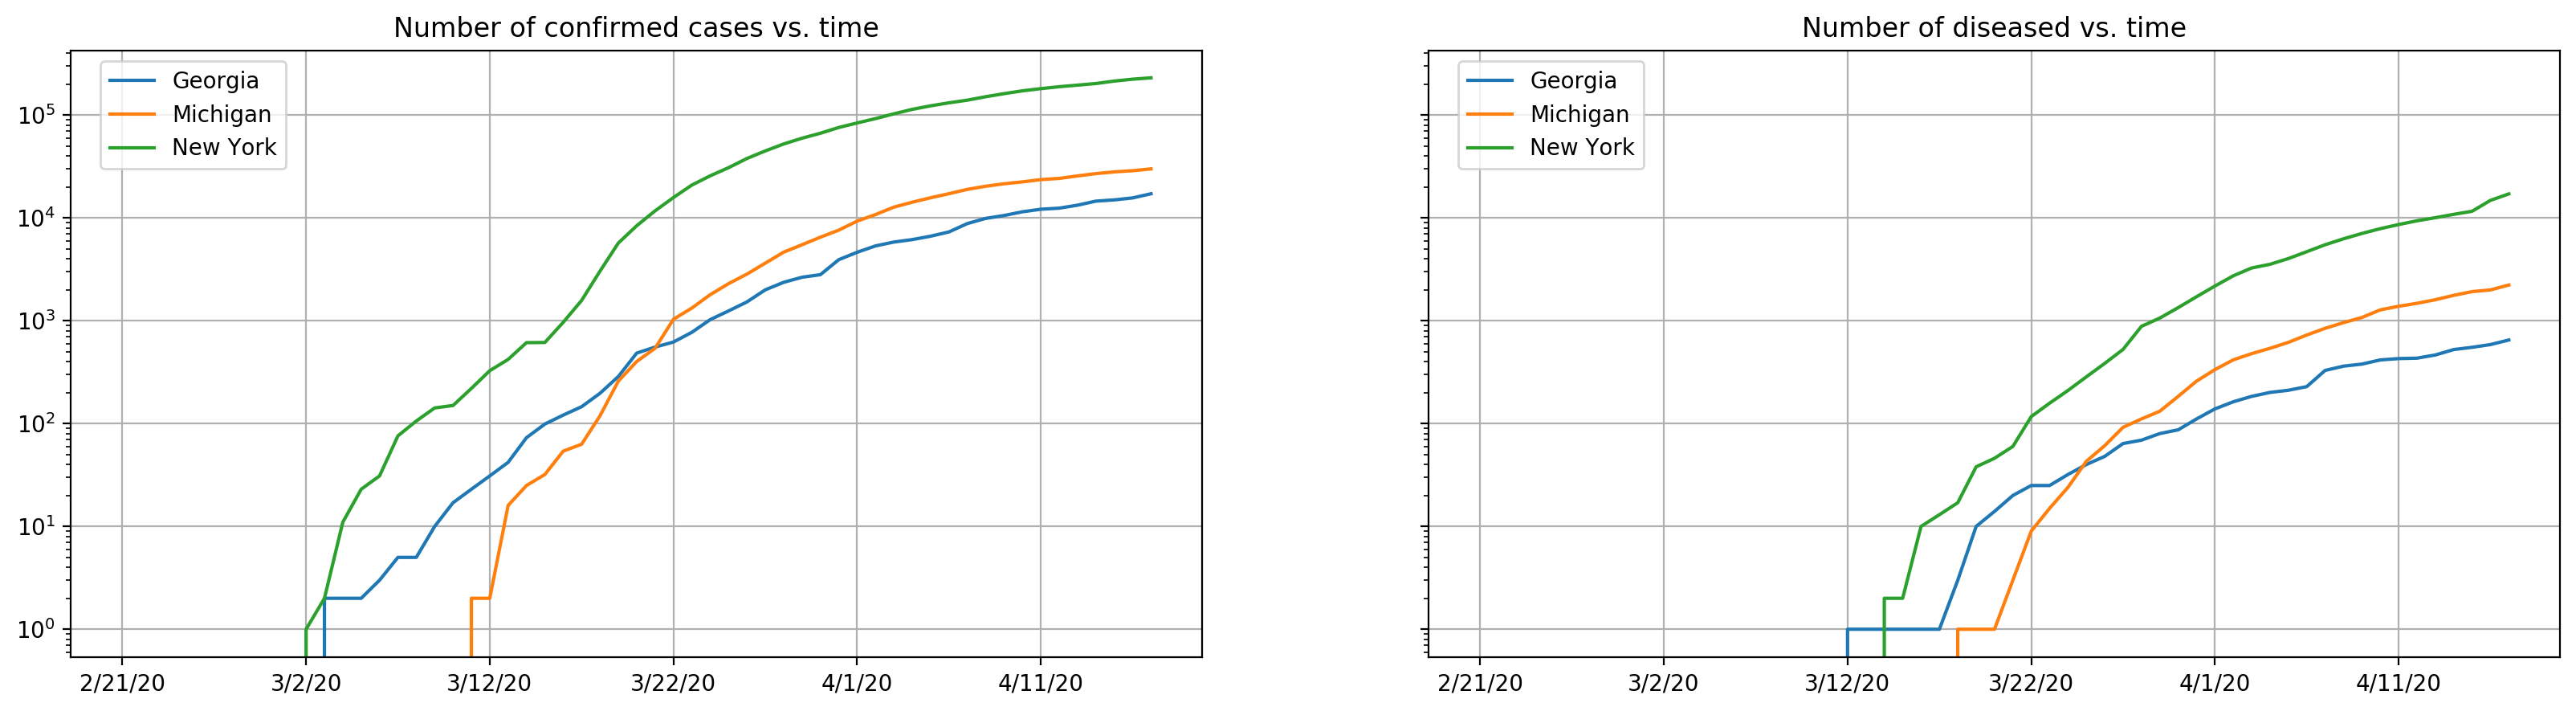

In [155]:
fig, (ax,ax2) = plt.subplots(1, 2, sharey=True,  figsize=(20,5), dpi=200)
confirmed.loc[:, '2/21/20':].transpose().plot(ax=ax).legend(bbox_to_anchor=(0.2, 1))
dead.loc[:, '2/21/20':].transpose().plot(ax=ax2).legend(bbox_to_anchor=(0.2, 1))
ax.set_yscale('log')
ax2.set_yscale('log')
ax.set_title('Number of confirmed cases vs. time')
ax2.set_title('Number of diseased vs. time')
ax.grid(True, axis='both')
ax2.grid(True, axis='both')
plt.savefig('cases_vs_dead_comparison_GA_NY_MI.png', bbox_inches='tight')

In [142]:
testdat = pd.read_csv('full-list-cumulative-total-tests-per-million.csv')
testdat

,Entity,Code,Date,Cumulative total tests per million
0,Australia - units unclear,NaN,"Mar 22, 2020",5632.530240
1,Australia - units unclear,NaN,"Mar 29, 2020",8317.959198
2,Australia - units unclear,NaN,"Apr 2, 2020",10276.328100
3,Austria - units unclear,NaN,"Feb 25, 2020",24.822909
4,Austria - units unclear,NaN,"Feb 26, 2020",36.551164
...,...,...,...,...
562,United States - specimens tested (CDC),NaN,"Mar 21, 2020",317.791125
563,United States - specimens tested (CDC),NaN,"Mar 22, 2020",332.101773
564,United States - specimens tested (CDC),NaN,"Mar 23, 2020",358.224815
565,United States - specimens tested (CDC),NaN,"Mar 24, 2020",383.656915


In [144]:
def top_5_counties(state_df, state_name):
    state = state_df[(state_df.Province_State==state_name)]
    state = state.drop(columns=['UID','iso2','iso3','code3','FIPS','Country_Region','Lat','Long_','Combined_Key','Province_State'])
    top5_counties = state.groupby(by='Admin2').sum().sum(axis=1).sort_values(ascending=False)[:5].index.tolist()
    state_info = state[state.Admin2.isin(top5_counties)].set_index('Admin2').transpose()
    state_info.columns.name = 'County'
    return state_info

In [146]:
not_of_interest = ['UID','iso2','iso3','code3','FIPS','Admin2','Country_Region','Lat','Long_','Combined_Key']

In [ ]:
mich = u[(u.Province_State=='Michigan')]
mich = mich.drop(columns=['UID','iso2','iso3','code3','FIPS','Country_Region','Lat','Long_','Combined_Key','Province_State'])

In [46]:
michtop5_counties = mich.groupby(by='Admin2').sum().sum(axis=1).sort_values(ascending=False)[:5].index.tolist()

In [ ]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(20,5), sharey=True)
top_5_counties(u, 'Michigan').plot(ax=ax)
top_5_counties(u, 'New York').plot(ax=ax2)
_ = plt.yscale('log')
_ = plt.xlabel('Date')
_ = plt.ylabel('No. Cases')

In [239]:
top_5_counties(u, 'Michigan').sum(axis=1)

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
3/29/20    4854
3/30/20    5704
3/31/20    6669
4/1/20     8118
4/2/20     9371
Length: 72, dtype: int64

In [245]:
top_5_counties(u, 'Michigan').transpose().replace(0, np.nan).bfill(1).iloc[:, 0]

County
Genesee      4.0
Macomb       1.0
Oakland      1.0
Washtenaw    3.0
Wayne        1.0
Name: 1/22/20, dtype: float64

In [269]:
timeseries = pd.concat((top_5_counties(u, 'New York').loc['3/2/20':, :], top_5_counties(u, 'Michigan').loc['3/11/20':, :]),axis=1).replace(to_replace=0, value=np.nan)

In [274]:
rotations = timeseries.isna().sum().tolist()

timeseries2 = timeseries.copy()
for i, c in enumerate(timeseries2.columns):
    timeseries2[c]=np.roll(timeseries2[c], -rotations[i],axis=0)

In [303]:
tmp = timeseries2.Oakland
timeseries2=timeseries2.drop(columns='Oakland')

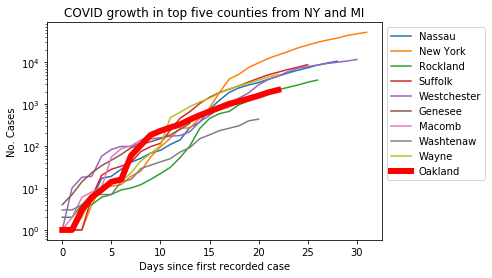

In [444]:
ax = timeseries2.reset_index(drop=True).plot()#.legend()
_  = tmp.reset_index(drop=True).plot(color='r', ax=ax, linewidth=6, label='Oakland')
plt.legend(bbox_to_anchor=(1, 1))
_ = plt.yscale('log')
_ = plt.ylabel('No. Cases')
_ = plt.xlabel('Days since first recorded case')
_ = plt.title('COVID growth in top five counties from NY and MI')

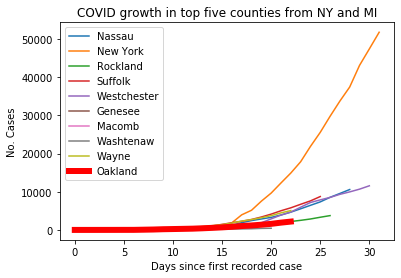

In [439]:
ax = timeseries2.reset_index(drop=True).plot()#.legend(bbox_to_anchor=(1, 1))
_  = tmp.reset_index(drop=True).plot(color='r', ax=ax, linewidth=6,label='Oakland')
plt.legend()
_ = plt.ylabel('No. Cases')
_ = plt.xlabel('Days since first recorded case')
_ = plt.title('COVID growth in top five counties from NY and MI')

In [246]:
top_5_counties(u, 'New York').transpose().replace(0, np.nan).bfill(1).iloc[:, 0]

County
Nassau         1.0
New York       1.0
Rockland       2.0
Suffolk        1.0
Westchester    1.0
Name: 1/22/20, dtype: float64

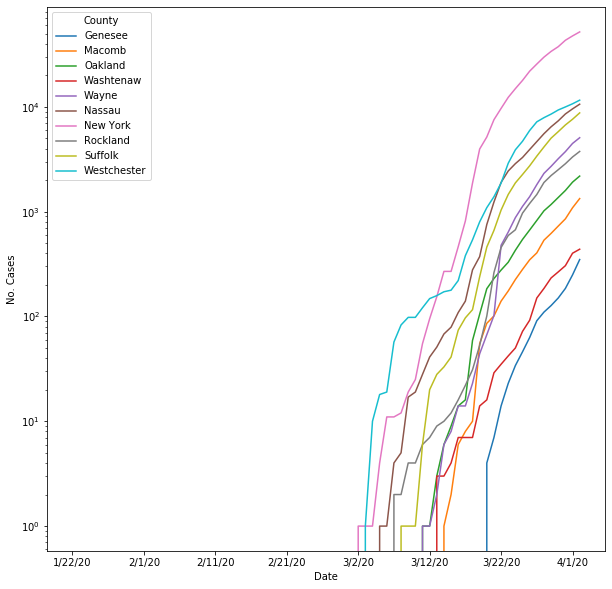

In [108]:
# fig = plt.figure()
ax = top_5_counties(u, 'Michigan').plot(figsize=(10,10))
top_5_counties(u, 'New York').plot(ax=ax)
_ = plt.yscale('log')
_ = plt.xlabel('Date')
_ = plt.ylabel('No. Cases')

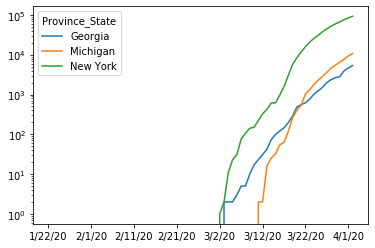

In [336]:
compare = u[(u.Province_State=='Michigan') | (u.Province_State=='New York') | (u.Province_State=='Georgia')]
ctest = compare.drop(columns=not_of_interest).groupby('Province_State').sum().transpose()#.plot()
_ = ctest.plot()
plt.yscale('log')

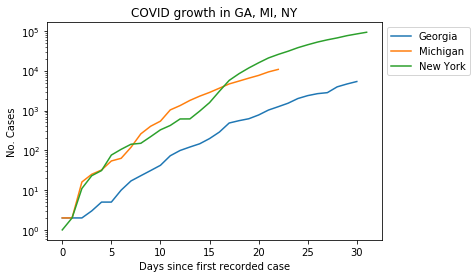

In [437]:
ctest2.reset_index(drop=True).plot().legend(bbox_to_anchor=(1, 1))
_ = plt.yscale('log')
_ = plt.ylabel('No. Cases')
_ = plt.xlabel('Days since first recorded case')
_ = plt.title('COVID growth in GA, MI, NY')

In [ ]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax.plot(nedcf, label='New York')
ax.plot(medcf, label='Michigan')
_ = ax.legend()
ax.set_ylabel('No. Cases')
ax.set_xlabel('No. days since first recorded case')

ax2.plot(nedcf, label='New York')
ax2.plot(medcf, label='Michigan')
_ = ax2.legend()
ax2.set_ylabel('No. Cases')
ax2.set_xlabel('No. days since first recorded case')
ax2.set_yscale('log')

In [332]:
stateagg = compare.drop(columns=not_of_interest).groupby('Province_State').sum().astype(float)#.apply(np.log10)
stateagg.index.name = None

In [227]:
mval = stateagg.transpose().values[:, 0]
nval = stateagg.transpose().values[:, 1]

In [228]:
nedcf = nval[-31:]

In [229]:
medcf = np.roll(mval,-8)[-31:]

In [231]:
medcf[np.where(medcf==0)]=np.nan

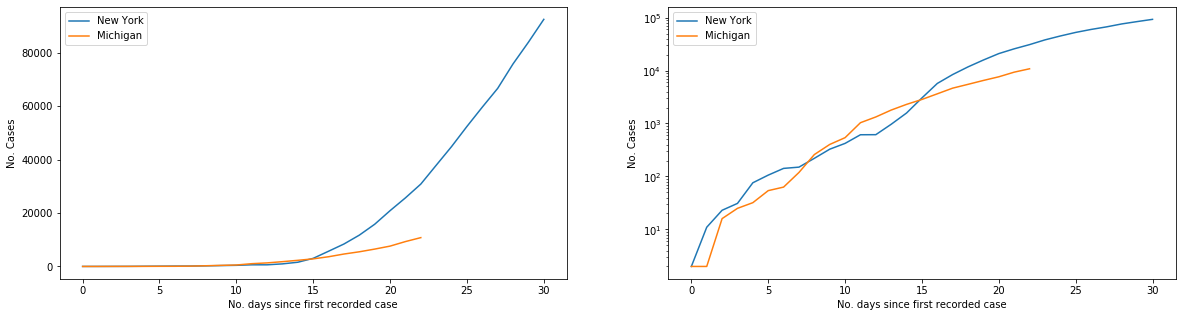

In [236]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax.plot(nedcf, label='New York')
ax.plot(medcf, label='Michigan')
_ = ax.legend()
ax.set_ylabel('No. Cases')
ax.set_xlabel('No. days since first recorded case')

ax2.plot(nedcf, label='New York')
ax2.plot(medcf, label='Michigan')
_ = ax2.legend()
ax2.set_ylabel('No. Cases')
ax2.set_xlabel('No. days since first recorded case')
ax2.set_yscale('log')

In [12]:
not_of_interest = ['UID','iso2','iso3','code3','FIPS','Admin2','Country_Region','Lat','Long_','Combined_Key']

In [221]:
g = pd.read_csv(global_cases)

In [222]:
gc = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_global.csv'
gd = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_deaths_global.csv'
gr = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_recovered_global.csv'

In [223]:
global_confirmed = pd.read_csv(gc)
global_dead = pd.read_csv(gd)
global_recovered = pd.read_csv(gr)

In [244]:
global_recovered_dates_only = global_recovered.set_index('Country/Region').loc[:, '1/22/20':].groupby(level=0).sum()
global_confirmed_dates_only = global_confirmed.set_index('Country/Region').loc[:, '1/22/20':].groupby(level=0).sum()
global_dead_dates_only = global_dead.set_index('Country/Region').loc[:, '1/22/20':].groupby(level=0).sum()

In [178]:
global_dead['type']='Dead'
global_confirmed['type']='Confirmed'
global_recovered['type']='Recovered'

In [181]:
dead=global_dead[global_dead['Country/Region'].isin(['Germany', 'Italy', 'US'])].set_index('Country/Region').loc[:,'1/22/20':]#.iloc[:, 4:].transpose().columns
confirmed=global_confirmed[global_confirmed['Country/Region'].isin(['Germany', 'Italy', 'US'])].set_index('Country/Region').loc[:,'1/22/20':]#.iloc[:, 4:].transpose().columns

In [182]:
rate = dead/confirmed

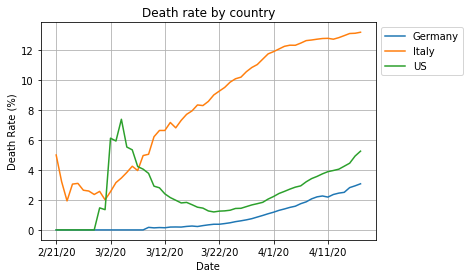

In [256]:
(100*rate.loc[:, '2/21/20':]).transpose().plot().legend(bbox_to_anchor=(1, 1))
_ = plt.xlabel('Date')
_ = plt.ylabel('Death Rate (%)')
plt.grid(True, axis='both')
plt.title('Death rate by country')
plt.savefig('death_rate_GR_ITA_USA.png', bbox_inches='tight')

In [246]:
global_dead = global_dead.sort_index(axis=1)
global_confirmed = global_confirmed.sort_index(axis=1)
global_recovered = global_recovered.sort_index(axis=1)

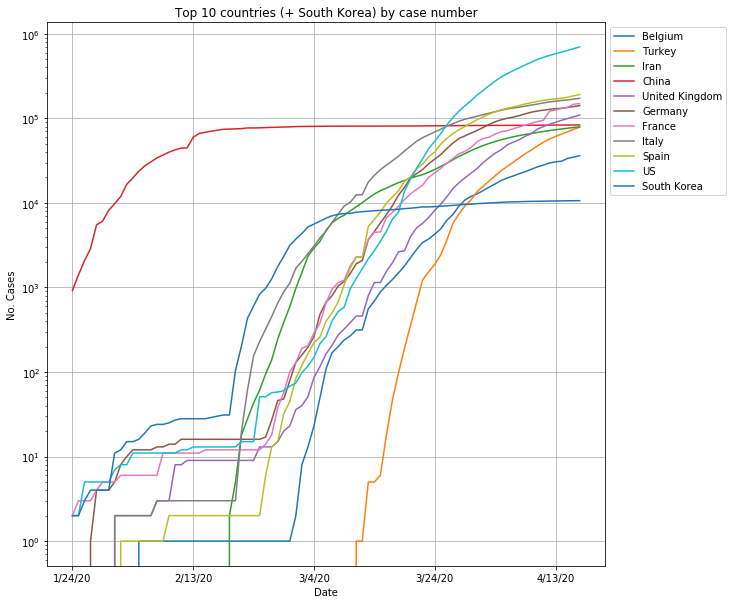

In [188]:
g11.plot(figsize=(10,10)).legend(bbox_to_anchor=(1, 1))
plt.yscale('log')
plt.ylabel('No. Cases')
plt.xlabel('Date')
plt.grid(True, axis='both')
plt.title('Top 10 countries (+ South Korea) by case number')
plt.savefig('top_10_countries.png', bbox_inches='tight')

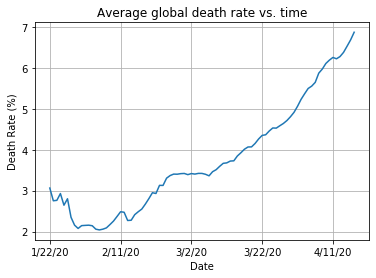

In [255]:
dsum = global_dead_dates_only.sum()
csum = global_confirmed_dates_only.sum()
drsum = 100*dsum/csum
drsum.plot()
_ = plt.xlabel('Date')
_ = plt.ylabel('Death Rate (%)')
_ = plt.title('Average global death rate vs. time')
plt.grid(True, axis='both')
plt.savefig('death_rate_global.png', bbox_inches='tight')